Section 1.

a) f'(X) = 1
b) f'(X) = -2X                     f'(Y) = 2X
c) f'(X) = 0.02Y(X^2)              f'(Y) = -0.02Y(X^2)
d) f'(X) = -0.04X

In [4]:
#Section 1
#These Differentials were done in moles due to to the number being too large for the runtime env.


def model(z,t):
    x = z[0]
    y = z[1]
    
    k1 = 1
    k2 = 2
    k3 = 0.02
    k4 = 0.04
    
    dxdt = (k1) + (-k2*x) + (k3*y*(x**2)) + (-k4*x)
    dydt = (k2*x) + (-k3*y*(x**2))
    dzdt = [dxdt, dydt]
    
    return dzdt

In [10]:
#Section 2
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def differentialSolve(starting_x, starting_y, timeUnits):
    #initial values of X and Y
    z0 = [starting_x,starting_y]

    # number of time points
    n = timeUnits

    # time points
    t = range(0,n)
    
    #store solution
    x = np.empty_like(t)
    y = np.empty_like(t)
    # record initial conditions
    x[0] = starting_x
    y[0] = starting_y
    
    # solve ODE
    for i in range(1,n):
        # span for next time step
        tspan = [t[i-1],t[i]]
        # solve for next step
        z = odeint(model,z0,tspan)
        # store solution for plotting
        x[i] = z[1][0]
        y[i] = z[1][1]
        # next initial condition
        z0 = z[1]
        print(z0)
        
    
    plt.plot(t,x,'b-',label='X')
    plt.plot(t,y,'r--',label='Y')
    plt.ylabel('particles')
    plt.xlabel('time')
    plt.legend(loc='best')
    plt.show()
    

[0.42686198 0.5618883 ]
[0.48420039 1.48597889]
[0.49380003 2.45677373]
[0.49717665 3.43357166]
[0.49976227 4.4110466 ]
[0.50228248 5.38848555]
[0.50483752 6.36578826]
[0.50744298 7.34293735]
[0.51010284 8.31992674]
[0.51281959 9.29675173]
[ 0.51559558 10.27340761]
[ 0.51843329 11.24988951]
[ 0.52133535 12.22619228]
[ 0.52430456 13.20231048]
[ 0.52734389 14.17823839]
[ 0.53045653 15.15396997]
[ 0.53364589 16.12949881]
[ 0.5369156  17.10481812]
[ 0.54026957 18.0799207 ]
[ 0.543712   19.05479892]
[ 0.54724742 20.02944462]
[ 0.5508807  21.00384909]
[ 0.55461711 21.97800307]
[ 0.55846234 22.95189661]
[ 0.56242257 23.92551906]
[ 0.56650455 24.89885895]
[ 0.57071559 25.87190393]
[ 0.57506372 26.84464068]
[ 0.57955771 27.81705475]
[ 0.58420723 28.78913046]
[ 0.58902291 29.76085074]
[ 0.59401653 30.73219694]
[ 0.59920116 31.70314861]
[ 0.60459137 32.67368326]
[ 0.61020346 33.64377604]
[ 0.61605573 34.61339941]
[ 0.62216887 35.58252268]
[ 0.62856637 36.55111148]
[ 0.635275  37.5191271]
[ 0.6423

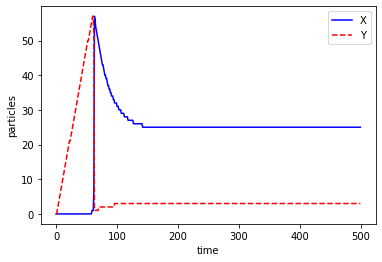

In [11]:
differentialSolve(0,0,500)

In [12]:
import random

def event(x,y):
    a1= 1
    a2= 2*x
    a3 = 0.02*y*x**2
    a4 = 0.04*x
    
    a0 = a1 + a2 + a3 + a4
    
    time_passed = (-1/a0)*np.log(1-random.uniform(0,1))
    
    event = random.uniform(0,a0)
    
    if event < a1:
        return x + 1, y, time_passed
    elif event < a1+a2:
        return x-1, y+1, time_passed
    elif event < a1+a2+a3:
        return x+1, y-1, time_passed
    else:
        return x-1, y, time_passed

    
def gillespieAlgo(start_x, start_y, stop_time):
    
    #store solution
    x_plot = []
    y_plot = []
    t = []
    
    x = start_x
    y = start_y
    time = 0.0
    
    while time < stop_time:
        
        x_plot.append(x)
        y_plot.append(y)
        t.append(time)
        
        x,y,event_time = event(x,y)
        
        time += event_time
            
    
    plt.plot(t,x_plot,'b-',label='X')
    plt.plot(t,y_plot,'r--',label='Y')
    plt.ylabel('particles')
    plt.xlabel('time')
    plt.legend(loc='best')
    plt.show()
    

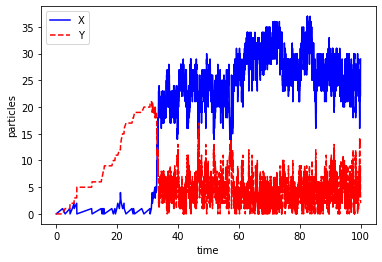

In [13]:
gillespieAlgo(0,0,100)